In [1]:
"""
Data generation
"""
import random
import math
import matplotlib.pyplot as plt

def generate_circle(n,radius=1):
    """
    Data generated on a circle
    """
    pts = []
    count = 0
    while len(pts) < n:
        x,y = random.uniform(-radius,radius),random.uniform(-radius,radius)
 
        if x*x+y*y <= radius:
            pts.append((x,y))
        count+=1
    # print("Done generating")
    return pts
    
def generate_circle_circumference(n,radius=1):
    """
    Data generated on the boundary of a circle
    """
    points = []
    for _ in range(n):
        angle = random.random()
        x = radius*math.cos(angle*2*math.pi)
        y = radius*math.sin(angle*2*math.pi)
        points.append((x,y))
    return points

def generate_square(n,length=1):
    """
    Data generated on a square
    """
    return [(random.uniform(0, length),random.uniform(0, length)) for i in range(n)]

def generate_poly(n):
    """
    Data generated on the curve y = x**2
    """
    x,y = 0,0
    pts = []
    for _ in range(n):
        x += random.uniform(0, 1)
        y = x**2
        pts.append((x,y))
    return pts

def generate_fixed_sized_disk(n,h):
    """
    Data generated on a disk, and ensures hullsize = h
    """
    inner_points = generate_circle(n-h)
    sqrt2 = math.sqrt(2)
    hull_points = [ (sqrt2,sqrt2) , (-sqrt2,sqrt2) , (sqrt2,-sqrt2) , (-sqrt2,-sqrt2) ]
    return inner_points + hull_points + generate_circle_circumference(h-4,radius=2)

generators = [generate_circle,generate_circle_circumference,generate_square,generate_poly]
#generators = [generate_square, generate_circle_circumference]
def plot(random_points,ch,color = "g-"):
    plt.plot(*list(zip(*random_points)),"c.")
    plt.plot(*list(zip(*ch)),color)
    plt.show()
counter_left_turn = 0
def left_turn(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    global counter_left_turn
    counter_left_turn += 1
    return x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2) >= 0

def test_convex_hull(CH_algo,n):
    for generator in generators:
        print(generator.__doc__)
        random_points = generator(n)
        ch = CH_algo(random_points)
        backslashN = "\n"
        print(f"{CH_algo.__doc__.replace(backslashN,'').rstrip()} computed a hull of size {len(ch)} and the pointset has size {n}")
        plot(random_points,ch)
    print(generate_fixed_sized_disk.__doc__)
    random_points = generate_fixed_sized_disk(n,10)
    ch = CH_algo(random_points)
    print(f"{CH_algo.__doc__.replace(backslashN,'').rstrip()} computed a hull of size {len(ch)} and the pointset has size {n}")
    plot(random_points,ch)


    Data generated on a circle
    
    Graham's Scan computed a hull of size 9 and the pointset has size 30


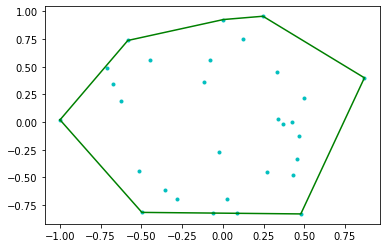


    Data generated on the boundary of a circle
    
    Graham's Scan computed a hull of size 32 and the pointset has size 30


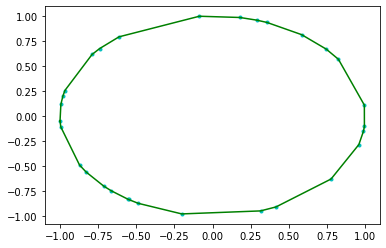


    Data generated on a square
    
    Graham's Scan computed a hull of size 10 and the pointset has size 30


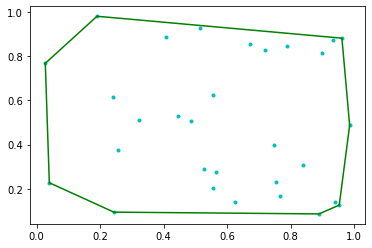


    Data generated on the curve y = x**2
    
    Graham's Scan computed a hull of size 32 and the pointset has size 30


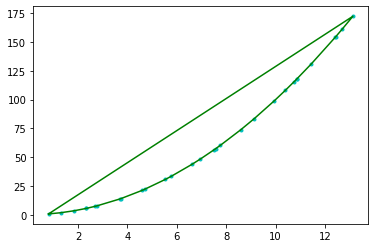


    Data generated on a disk, and ensures hullsize = h
    
    Graham's Scan computed a hull of size 12 and the pointset has size 30


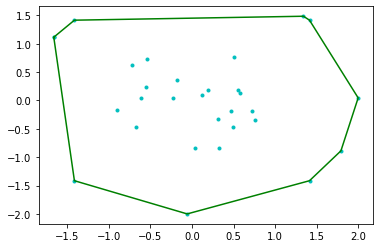

In [2]:
def partition(arr, low, high):
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
  
    for j in range(low, high):
  
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
  
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
  
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)
  
# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low  --> Starting index,
# high  --> Ending index
  
# Function to do Quick sort
  
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
  
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
  
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
  

"""
Part A Graham's Scan
"""

def INC_CH(pointss):
    """
    Graham's Scan
    """
    points = pointss
    quickSort(points, 0, len(points)-1)
    # print(points)
    # points = sorted(pointss)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return upper + lower

test_convex_hull(INC_CH,30)


    Data generated on a circle
    
    Gift Wrapping computed a hull of size 22 and the pointset has size 250


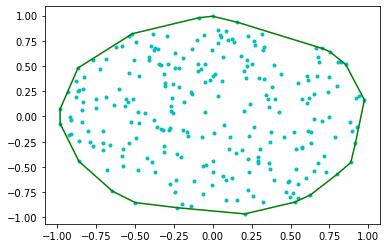


    Data generated on the boundary of a circle
    
    Gift Wrapping computed a hull of size 251 and the pointset has size 250


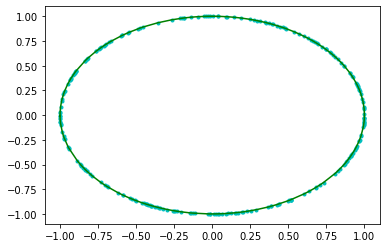


    Data generated on a square
    
    Gift Wrapping computed a hull of size 16 and the pointset has size 250


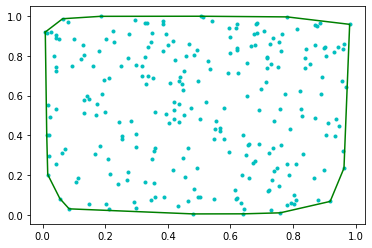


    Data generated on the curve y = x**2
    
    Gift Wrapping computed a hull of size 251 and the pointset has size 250


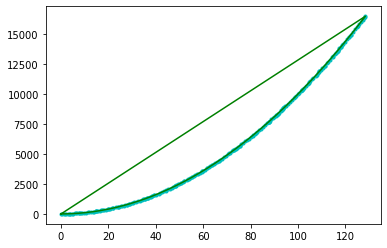


    Data generated on a disk, and ensures hullsize = h
    
    Gift Wrapping computed a hull of size 11 and the pointset has size 250


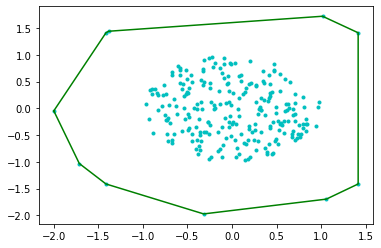

In [3]:
"""
Part B Gift Wrapping
"""

from copy import deepcopy

def GIFT_CH(pts):
    """
    Gift Wrapping
    """
    count = 0
    points = deepcopy(pts)
    p_start = min(points)
    CH = [p_start]
    p_left = p_start
    q = points[0] if not points[0] == p_start else points[1]
    while True:
        for z in points:
            if z == q:
                continue
            if not left_turn(p_left,z,q):
                q = z
        CH.append(q)
        if q in points:
            points.remove(q)
        if points:
            p_left = q
            q = points[0]
        else:
            break
        if p_left == p_start:
            break
    return CH

test_convex_hull(GIFT_CH,250)

In [4]:
def INC_CH_upper(pointss):
    """
    Graham's Scan, upper hull only
    """
    points = pointss
    quickSort(points, 0, len(points)-1)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return upper
def INC_CH_lower(pointss):
    """
    Graham's Scan, lower hull only
    """
    points = pointss
    quickSort(points, 0, len(points)-1)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return lower


    Data generated on a circle
    
    Chan's algorithm computed a hull of size 23 and the pointset has size 256


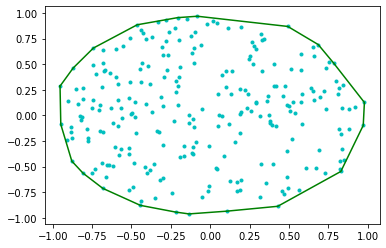


    Data generated on the boundary of a circle
    
    Chan's algorithm computed a hull of size 258 and the pointset has size 256


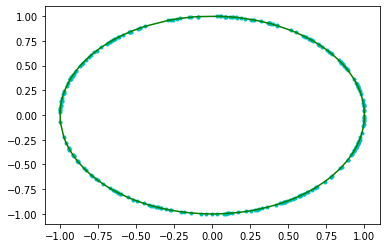


    Data generated on a square
    
    Chan's algorithm computed a hull of size 17 and the pointset has size 256


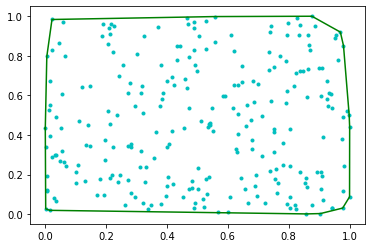


    Data generated on the curve y = x**2
    
    Chan's algorithm computed a hull of size 258 and the pointset has size 256


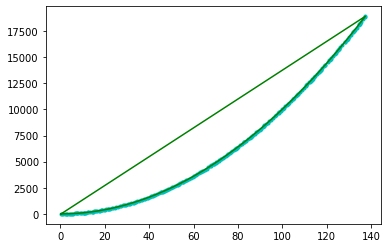


    Data generated on a disk, and ensures hullsize = h
    
    Chan's algorithm computed a hull of size 12 and the pointset has size 256


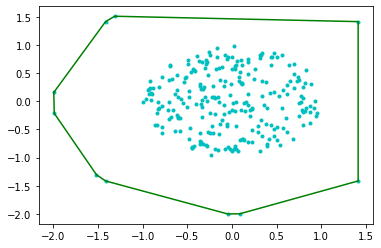

In [5]:
"""
Part C Chan's Algorithm
"""
TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

from copy import deepcopy
import math
def compute_tangent_binary(pts, p):
    low = 0
    high = len(pts)-1
    counter = 0
    if(len(pts)==2 and p in pts):
        # print("stop")
        # print(pts)
        # print("short circuit")
        # print(pts)
        res= max(pts)
        # print(res)
        return res
    while(low <= high and counter<10000):
        # print(counter)
        mid = math.floor((low+high)/2)
        counter += 1
        if mid+1>=len(pts):
            # print(mid, len(pts))
            # print("Early stop?")
            return pts[mid]
        if (left_turn(p,pts[mid+1],pts[mid]) and \
            not left_turn(p,pts[mid],pts[mid-1])):
            # print("Found best")
            return pts[mid]
        if not left_turn(p,pts[mid+1],pts[mid]):
            low = mid + 1
        else:
            high = mid - 1
    #print("Ran the funky")

def compute_tangent(pts, p):
    if len(pts) == 1:
        return pts[0]
    q = pts[0] if not pts[0] == p else pts[1]
    for z in pts:
        if z == q or z == p:
            continue
        if not left_turn(p,z,q):
            q = z
    return q

def UHwithSize(pts,h):
    n = len(pts)
    # Arbitrarily partition P into m =n/h subsets P1, · · · , Pm of size h each
    points = deepcopy(pts)
    m = math.ceil(n/h)
    partitions = [points[h*i:h*(i+1)] for i in range(m)]
    # Compute upper hull Ui of Pi, i = 1, · · · , m. . Next, we merge the upper hulls
    upper_hulls = [INC_CH_upper(partition) for partition in partitions] #recursively?
    hull_points = [pt for hull in upper_hulls for pt in hull]
    reversed_hulls = [hull[::-1] for hull in upper_hulls]
    # print(reversed_hulls)
    # Initialize the upper hull U = {}
    # Initialize p ← point with smallest x-coordinate
    final_hull = []
    p = min(points)
    maxx = max(points)[0]
    # print("maxx:", maxx)
    # Initialize l ← upwards ray from p
    q = compute_tangent(hull_points,p) ## what is this used for
    ## ray is now p -> q, but not used for anything
    for _ in range(h):
        final_hull.append(p)
        if p[0] == maxx:
            break
        # print("p: ", p)
        # print("hulls: ", reversed_hulls)

        #compute the upper tangent t_i from p to U_i (if it exists)
        # tangent_points_bin = [compute_tangent_binary(hull,p) for hull in reversed_hulls if len(hull) > 0 ]
        # print("binary: ", tangent_points)
        tangent_points = [compute_tangent_binary(hull,p) for hull in reversed_hulls if len(hull) > 0 ]
        # print("point",p)
        # print("linear: ", tangent_points)
        # if(tangent_points_bin!=tangent_points):
        #     print("linear: ", tangent_points)
        #     print("bin: ", tangent_points_bin)
        #     print("FUCKUP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            # with open("failing_case.txt", 'w') as f:
            #     f.writelines([f"{str(pt[0])} {str(pt[1])}\n" for pt in pts])
        #t ← tangent that makes the smallest angle with l
        #p ← the other tangent point on t . This is like the “change of pivot” in gift wrapping
        #l ← t . This is like “rotating the ray” in gift wrapping
        p = compute_tangent(tangent_points,p)
        #Remove any vertex of every Ui that is to the left of p . This could make some Ui empty
        for hull in reversed_hulls:
            for i in range(len(hull)-1, 0,-1):
                # if(hull[i][0]<=(p[0]+0.001)):
                if(hull[i][0]<=p[0]):
                    hull.pop()
                else:
                    break
        # reversed_hulls = [ [point for point in hull if point[0]>p[0]] for hull in reversed_hulls ]
    return p[0] == maxx, final_hull

def LHwithSize(pts,h):
    n = len(pts)
    # Arbitrarily partition P into m =n/h subsets P1, · · · , Pm of size h each
    points = deepcopy(pts)
    m = math.ceil(n/h)
    partitions = [points[h*i:h*(i+1)] for i in range(m)]
    # Compute upper hull Ui of Pi, i = 1, · · · , m. . Next, we merge the upper hulls
    upper_hulls = [INC_CH_lower(partition) for partition in partitions] #recursively?
    hull_points = [pt for hull in upper_hulls for pt in hull]
    reversed_hulls = [hull[::-1] for hull in upper_hulls]
    # print(reversed_hulls)
    # Initialize the upper hull U = {}
    # Initialize p ← point with smallest x-coordinate
    final_hull = []
    p = max(points)
    minx = min(points)[0]
    # print("maxx:", maxx)
    # Initialize l ← upwards ray from p
    q = compute_tangent(hull_points,p) ## what is this used for
    ## ray is now p -> q, but not used for anything
    for _ in range(h):
        final_hull.append(p)
        if p[0] == minx:
            break
        # print("p: ", p)
        # print("hulls: ", reversed_hulls)

        #compute the upper tangent t_i from p to U_i (if it exists)
        # tangent_points_bin = [compute_tangent_binary(hull,p) for hull in reversed_hulls if len(hull) > 0 ]
        # print("binary: ", tangent_points)
        tangent_points = [compute_tangent_binary(hull,p) for hull in reversed_hulls if len(hull) > 0 ]
        # print("point",p)
        # print("linear: ", tangent_points)
        # if(tangent_points_bin!=tangent_points):
        #     print("linear: ", tangent_points)
        #     print("bin: ", tangent_points_bin)
        #     print("FUCKUP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            # with open("failing_case.txt", 'w') as f:
            #     f.writelines([f"{str(pt[0])} {str(pt[1])}\n" for pt in pts])
        #t ← tangent that makes the smallest angle with l
        #p ← the other tangent point on t . This is like the “change of pivot” in gift wrapping
        #l ← t . This is like “rotating the ray” in gift wrapping
        p = compute_tangent(tangent_points,p)
        #Remove any vertex of every Ui that is to the left of p . This could make some Ui empty
        for hull in reversed_hulls:
            for i in range(len(hull)-1, 0,-1):
                # if(hull[i][0]<=(p[0]+0.001)):
                if(hull[i][0]>=p[0]):
                    hull.pop()
                else:
                    break
        # reversed_hulls = [ [point for point in hull if point[0]>p[0]] for hull in reversed_hulls ]
    return p[0] == minx, final_hull

def CH_CH(pts):
    """
    Chan's algorithm
    """
    if isinstance(pts,int):
        return [pts]
    if len(pts) <= 1:
        return pts
    n = len(pts)
    # n = math.ceil(math.log2(math.log2(n)))
    #for i in range(math.ceil(math.log(math.log(n)))):
    for i in range(2,n): #unreachable to go above log(log(n)) and above gives errors
        success, upper_hull = UHwithSize(pts,2**(2**i))
        if success:
            break
    # print("done upper")
    for i in range(2,n):
        success, lower_hull = LHwithSize(pts,2**(2**i))
        if success:
            break
    return upper_hull + lower_hull

test_convex_hull(CH_CH,2**8)
#test_convex_hull(INC_CH_upper, (2**8)+100)

In [6]:
# def compute_tangent_binary(pts, p):
#     low = 0
#     high = len(pts)-1
#     while(low <= high):
#         mid = math.floor((low+high)/2)
#         print(low,mid,high)
#         if mid+1>=len(pts):
#             return pts[mid]
#         if (left_turn(p,pts[mid-1],pts[mid]) and \
#             not left_turn(p,pts[mid],pts[mid+1])):
#             return pts[mid]
#         if not left_turn(p,pts[mid-1],pts[mid]):
#             high = mid - 1
#         else:
#             low = mid + 1
        
# pts = [ (x,math.log(x)) for x in range(2,70) ]
# p = (10,3)
# plot((p,*pts), (p,compute_tangent_binary(pts,p)))
# plot((p,*pts), (p,compute_tangent(pts,p)))

Chan counter:  [[16, 221], [32, 308], [64, 613], [128, 1293], [256, 2663], [512, 5263], [1024, 11075], [2048, 21139], [4096, 42362]]
Graham counter [[16, 52], [32, 102], [64, 229], [128, 486], [256, 996], [512, 2020], [1024, 4070], [2048, 8164], [4096, 16355]]
Gift counter [[16, 190], [32, 430], [64, 1070], [128, 2350], [256, 4910], [512, 10030], [1024, 20270], [2048, 40750], [4096, 81710]]


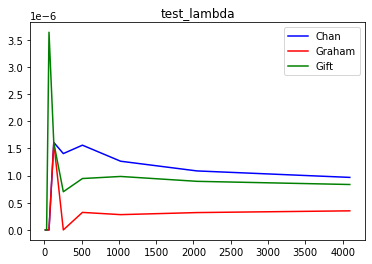

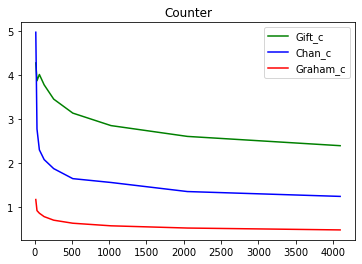

Chan counter:  [[16, 114], [32, 268], [64, 550], [128, 1066], [256, 2556], [512, 4780], [1024, 10206], [2048, 19069], [4096, 40794]]
Graham counter [[16, 49], [32, 114], [64, 237], [128, 489], [256, 1005], [512, 2028], [1024, 4073], [2048, 8168], [4096, 16354]]
Gift counter [[16, 92], [32, 196], [64, 531], [128, 1912], [256, 3960], [512, 8056], [1024, 19266], [2048, 32632], [4096, 89859]]


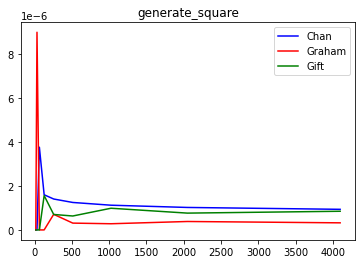

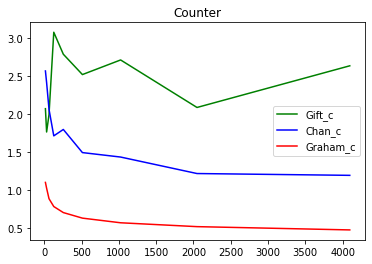

89859
Chan counter:  [[16, 150], [32, 615], [64, 1916], [128, 4242], [256, 9016], [512, 29211], [1024, 74398], [2048, 153918], [4096, 318220]]
Graham counter [[16, 40], [32, 84], [64, 185], [128, 374], [256, 759], [512, 1530], [1024, 3064], [2048, 6137], [4096, 12281]]
Gift counter [[16, 120], [32, 496], [64, 2016], [128, 8128], [256, 32640], [512, 130816], [1024, 523776], [2048, 2096128], [4096, 8386560]]


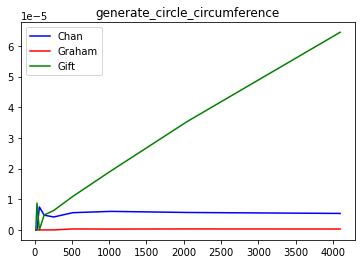

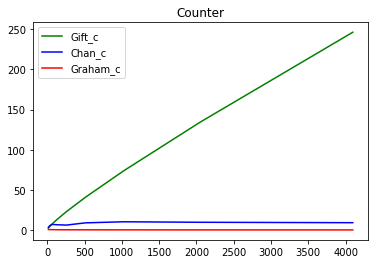

Chan counter:  [[16, 115], [32, 249], [64, 564], [128, 1252], [256, 2462], [512, 6321], [1024, 22028], [2048, 46656], [4096, 92276]]
Graham counter [[16, 48], [32, 108], [64, 240], [128, 488], [256, 989], [512, 2014], [1024, 4045], [2048, 8146], [4096, 16327]]
Gift counter [[16, 84], [32, 265], [64, 741], [128, 1912], [256, 5612], [512, 15376], [1024, 38171], [2048, 83107], [4096, 199479]]


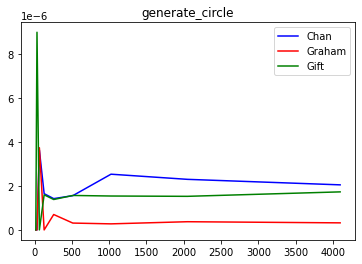

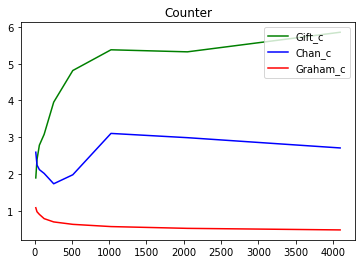

In [7]:
from timeit import Timer
import time
def timeAlgorithm(alg, generator):
    res = []
    res_counter = []
    for i in range(4,13):
        global counter_left_turn
        counter_left_turn = 0
        num_points = 2**i
        random_points = generator(num_points)
        t = Timer("CH_algo")
        start_time = time.time()
        ch = alg(random_points)
        end = time.time()
        res.append([num_points, end-start_time])
        res_counter.append([num_points,counter_left_turn])
    return res, res_counter

color = {"Chan": "b-", "Gift": "g-", "Graham": "r-"}

def experimentAndPlot(generator):
    res_chan, res_counter_chan = timeAlgorithm(CH_CH, generator)
    print("Chan counter: ", res_counter_chan)
    x, y = list(zip(*res_chan))
    x1, y1 = list(zip(*res_counter_chan))
    adjusted = []
    adjusted_c_chan = []
    for i in range(len(y)):
        adjusted.append((x[i], y[i]/(x[i]*math.log(x[i]))))
        adjusted_c_chan.append((x1[i], y1[i]/(x1[i]*math.log(x1[i]))))
    x, y = list(zip(*adjusted))
    plt.plot(x,y,color["Chan"], label="Chan")
    plt.legend

    res_graham, res_c_graham = timeAlgorithm(INC_CH_upper, generator)
    print("Graham counter", res_c_graham)
    x, y = list(zip(*res_graham))
    x1, y1 = list(zip(*res_c_graham))

    adjusted = []
    adjusted_c_graham = []
    for i in range(len(y)):
        adjusted.append((x[i], y[i]/(x[i]*math.log(x[i]))))
        adjusted_c_graham.append((x1[i], y1[i]/(x1[i]*math.log(x1[i]))))
    x, y = list(zip(*adjusted))
    plt.plot(x,y,color["Graham"], label="Graham")

    res_gift, res_c_gift = timeAlgorithm(GIFT_CH, generator)
    print("Gift counter", res_c_gift)
    x, y = list(zip(*res_gift))
    x1, y1 = list(zip(*res_c_gift))

    adjusted = []
    adjusted_c_gift = []
    for i in range(len(y)):
        adjusted.append((x[i], y[i]/(x[i]*math.log(x[i]))))
        adjusted_c_gift.append((x1[i], y1[i]/(x1[i]*math.log(x1[i]))))
    x, y = list(zip(*adjusted))
    plt.plot(x,y,color["Gift"], label="Gift")
    plt.title(generator.__name__)
    plt.legend()
    plt.show()

    x1,y1 = list(zip(*adjusted_c_gift))
    plt.plot(x1,y1,color["Gift"], label="Gift_c")
    x1,y1 = list(zip(*adjusted_c_chan))
    plt.plot(x1,y1,color["Chan"], label="Chan_c")
    x1, y1 = list(zip(*adjusted_c_graham))
    plt.plot(x1,y1,color["Graham"], label="Graham_c")
    plt.title("Counter")
    plt.legend()
    plt.show()

def test_lambda(x):
    """generate_fixed_sized_disk"""
    return generate_fixed_sized_disk(x, 20)
#test = lambda x : generate_fixed_sized_disk(x, 20)
experimentAndPlot(test_lambda)
experimentAndPlot(generate_square)
print(counter_left_turn)
experimentAndPlot(generate_circle_circumference)
experimentAndPlot(generate_circle)
# experimentAndPlot(generate_fixed_sized_disk(h=10, n=1000))

In [8]:
"""
Correctness
"""
from scipy.spatial import ConvexHull

def CH_library(pts):
    """
    Scipy.spatial ConvexHull
    """
    CH = [pts[idx] for idx in ConvexHull(pts).vertices]
    CH.append(CH[0])
    return CH

CH_algorithms = [CH_CH, INC_CH, GIFT_CH, CH_library]
colors = [color["Chan"],color["Graham"],color["Gift"],"k-"]
#colors = {CH_CH: color["Chan"] , INC_CH: color["Graham"] , GIFT_CH: color["Gift"] , CH_library: "k-"}

def correctness():
    for m in range(4,11):
        n = 2**m
        for generator in generators:
            for _ in range(20):
                pts = generator(n)
                hulls =[]
                for CH_algo in CH_algorithms:
                    hull = CH_algo(pts)
                    hulls.append(hull)
                for i in range(len(hulls)):
                    for j in range(i+1,len(hulls)):
                        if not set(hulls[i]) == set(hulls[j]):
                            plt.plot(*list(zip(*pts)),"c.")
                            print(i,j)
                            plt.plot(*list(zip(*hulls[i])),colors[i])
                            plt.plot(*list(zip(*hulls[j])),colors[j])
                            plt.show()
        print(f"Done with point sets of size {n}")
correctness()

Done with point sets of size 16
Done with point sets of size 32
Done with point sets of size 64
Done with point sets of size 128
Done with point sets of size 256
Done with point sets of size 512
Done with point sets of size 1024


In [9]:
for i in range(9,10):
    print(i)
    for j in range(100):
        # print(i)
        pts = generate_square(2**i)
        UH_graham = INC_CH_upper(pts)
        UH_chan = CH_CH(pts)
        UH_gift = GIFT_CH(pts)
        H_graham = INC_CH(pts)
        H_gift = GIFT_CH(pts)
        if(UH_graham!=UH_chan[:-1]):
            print(UH_graham)
            print(UH_chan)
        assert(UH_graham==UH_chan[:-1])
        assert(list(dict.fromkeys(H_graham))==list(dict.fromkeys(H_gift)))

9
[(0.00042867184025974225, 0.7440042435320267), (0.000587606582933442, 0.9099788918946872), (0.23457812639906428, 0.9797845188977125), (0.31397137874339043, 0.9874200567046477), (0.6136609976948167, 0.9933421981085827), (0.9552917658361032, 0.9881196126176874), (0.9691479757238758, 0.9816969142250886), (0.998896116013684, 0.9255496779461856), (0.999676066736016, 0.79007847090599)]
[(0.00042867184025974225, 0.7440042435320267), (0.000587606582933442, 0.9099788918946872), (0.23457812639906428, 0.9797845188977125), (0.31397137874339043, 0.9874200567046477), (0.6136609976948167, 0.9933421981085827), (0.9552917658361032, 0.9881196126176874), (0.9691479757238758, 0.9816969142250886), (0.998896116013684, 0.9255496779461856), (0.999676066736016, 0.79007847090599), (0.999676066736016, 0.79007847090599), (0.9987610353462343, 0.018243576864900524), (0.9120854998913446, 0.0028766365954349116), (0.5610553219888055, 0.0012971100417165093), (0.24433313350265162, 0.002299613772815734), (0.07774168188

AssertionError: 

In [ ]:
import numpy as np
arr = np.genfromtxt('failing_case.txt', delimiter=' ')    
pts = arr.tolist()
print(pts)

In [ ]:
p = [0.1847807375594075, 0.15663034943280751]
UH_chan = CH_CH(pts)
hull = INC_CH_upper(pts)

tangent_points = compute_tangent(hull, p)
tangent_points_bin = compute_tangent_binary(hull, p)

print(hull)
print(tangent_points)
print(tangent_points_bin)


In [ ]:
n = 100
h = 12
import math
m = math.ceil(n/h)
points = [i for i in range(n)]
[len(points[h*i:h*(i+1)]) for i in range(m) ]

In [ ]:
upper_hulls = [[(1,2),(3,4)],[(5,6),(7,8)]]
[p for hull in upper_hulls for p in hull]

In [ ]:
def compute_tangent(pts, p):
    q = pts[0] if not pts[0] == p else pts[1]
    for z in pts:
        if z == q or z == p:
            continue
        if not left_turn(p,z,q):
            q = z
    return q

pts = generate_square(10)
p = min(pts)
ch = [min(pts),compute_tangent(pts,p)]
plot(pts,ch)